In [ ]:
# Importing libraries

from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [ ]:
PATH = 'Fertilizer Prediction.csv'
df = pd.read_csv(PATH)

In [ ]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [ ]:
from numpy import array
from sklearn.preprocessing import LabelEncoder

In [ ]:
soil_type= array(df['Soil Type'].tolist())
crop_type= array(df['Crop Type'].tolist())

In [ ]:
crop_type

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Cotton', 'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Maize',
       'Cotton', 'Paddy', 'Ground Nuts', 'Sugarcane', 'Pulses', 'Barley',
       'Cotton', 'Wheat', 'Millets', 'Sugarcane', 'Tobacco', 'Millets',
       'Paddy', 'Maize', 'Cotton', 'Sugarcane', 'Oil seeds', 'Pulses',
       'Ground Nuts', 'Sugarcane', 'Paddy', 'Barley', 'Wheat', 'Millets',
       'Cotton', 'Paddy', 'Ground Nuts', 'Millets', 'Pulses', 'Sugarcane',
       'Tobacco', 'Sugarcane', 'Barley', 'Wheat', 'Oil seeds', 'Paddy',
       'Ground Nuts', 'Maize', 'Tobacco', 'Oil seeds', 'Pulses', 'Barley',
       'Cotton', 'Millets', 'Wheat', 'Millets', 'Sugarcane',
       'Ground Nuts', 'Paddy', 'Wheat', 'Cotton', 'Barley', 'Oil seeds',
       'Cotton', 'Sugarcane', 'Sugarcane', 'Pulses', 'Millets', 'Pulses',
       'Tobacco', 'Wheat', 'Oil seeds', 'Ground Nuts', 'Paddy', 'Maize',
       'Sugarcane', 'Pulses', 'Cotton', 'Paddy', 'Millets', 'Cotton'

In [ ]:
soil_type

array(['Sandy', 'Loamy', 'Black', 'Red', 'Clayey', 'Sandy', 'Red',
       'Loamy', 'Sandy', 'Black', 'Clayey', 'Sandy', 'Loamy', 'Clayey',
       'Red', 'Black', 'Clayey', 'Sandy', 'Black', 'Loamy', 'Sandy',
       'Loamy', 'Red', 'Black', 'Clayey', 'Sandy', 'Red', 'Loamy',
       'Black', 'Clayey', 'Red', 'Loamy', 'Clayey', 'Sandy', 'Loamy',
       'Black', 'Loamy', 'Clayey', 'Red', 'Sandy', 'Clayey', 'Loamy',
       'Red', 'Black', 'Sandy', 'Loamy', 'Black', 'Clayey', 'Red',
       'Sandy', 'Red', 'Black', 'Clayey', 'Sandy', 'Red', 'Black',
       'Loamy', 'Sandy', 'Loamy', 'Red', 'Clayey', 'Loamy', 'Black',
       'Sandy', 'Black', 'Red', 'Black', 'Loamy', 'Clayey', 'Sandy',
       'Clayey', 'Red', 'Loamy', 'Black', 'Red', 'Clayey', 'Sandy',
       'Loamy', 'Clayey', 'Red', 'Clayey', 'Sandy', 'Black', 'Loamy',
       'Sandy', 'Clayey', 'Red', 'Black', 'Loamy', 'Loamy', 'Black',
       'Clayey', 'Red', 'Sandy', 'Clayey', 'Red', 'Loamy', 'Sandy',
       'Black'], dtype='<U6')

In [ ]:
label_encoder = LabelEncoder()
integer_encoded1 = label_encoder.fit_transform(soil_type)
integer_encoded2 = label_encoder.fit_transform(crop_type)

In [ ]:
integer_encoded1

array([4, 2, 0, 3, 1, 4, 3, 2, 4, 0, 1, 4, 2, 1, 3, 0, 1, 4, 0, 2, 4, 2,
       3, 0, 1, 4, 3, 2, 0, 1, 3, 2, 1, 4, 2, 0, 2, 1, 3, 4, 1, 2, 3, 0,
       4, 2, 0, 1, 3, 4, 3, 0, 1, 4, 3, 0, 2, 4, 2, 3, 1, 2, 0, 4, 0, 3,
       0, 2, 1, 4, 1, 3, 2, 0, 3, 1, 4, 2, 1, 3, 1, 4, 0, 2, 4, 1, 3, 0,
       2, 2, 0, 1, 3, 4, 1, 3, 2, 4, 0])

In [ ]:
dict1={}
for i in range(len(integer_encoded1)):
  dict1[soil_type[i]]=integer_encoded1[i]
dict2={}
for i in range(len(integer_encoded2)):
  dict2[crop_type[i]]=integer_encoded2[i]

In [ ]:
dict1

{'Black': 0, 'Clayey': 1, 'Loamy': 2, 'Red': 3, 'Sandy': 4}

In [ ]:
dict2

{'Barley': 0,
 'Cotton': 1,
 'Ground Nuts': 2,
 'Maize': 3,
 'Millets': 4,
 'Oil seeds': 5,
 'Paddy': 6,
 'Pulses': 7,
 'Sugarcane': 8,
 'Tobacco': 9,
 'Wheat': 10}

In [ ]:
df['Soil Type']=df['Soil Type'].map(dict1)
df['Crop Type']=df['Crop Type'].map(dict2)

In [ ]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,Urea
1,29,52,45,2,8,12,0,36,DAP
2,34,65,62,0,1,7,9,30,14-35-14
3,32,62,34,3,9,22,0,20,28-28
4,28,54,46,1,6,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,28-28
95,30,60,27,3,9,4,17,17,10-26-26
96,38,72,51,2,10,39,0,0,Urea
97,36,60,43,4,4,15,0,41,DAP


In [ ]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type           int64
Crop Type           int64
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [ ]:
df.size

891

In [ ]:
df.columns

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')

In [ ]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [ ]:
df.dtypes

Temparature         int64
Humidity            int64
Moisture            int64
Soil Type           int64
Crop Type           int64
Nitrogen            int64
Potassium           int64
Phosphorous         int64
Fertilizer Name    object
dtype: object

In [ ]:
df['Fertilizer Name'].value_counts()

Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
10-26-26     7
17-17-17     7
Name: Fertilizer Name, dtype: int64

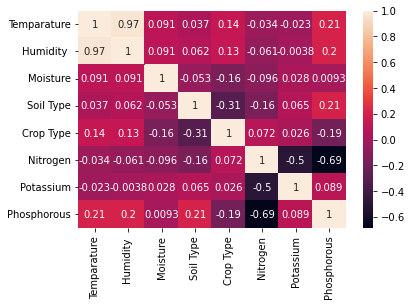

In [ ]:
sns.heatmap(df.corr(),annot=True)

In [ ]:
features=df
target = features.pop('Fertilizer Name')
label = target

In [ ]:
features

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous
0,26,52,38,4,3,37,0,0
1,29,52,45,2,8,12,0,36
2,34,65,62,0,1,7,9,30
3,32,62,34,3,9,22,0,20
4,28,54,46,1,6,35,0,0
...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19
95,30,60,27,3,9,4,17,17
96,38,72,51,2,10,39,0,0
97,36,60,43,4,4,15,0,41


In [ ]:
# Initializing empty lists to append all model's name and corresponding name
acc = []
model = []

In [ ]:
# Splitting into train and test data

from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

DecisionTree = DecisionTreeClassifier(criterion="entropy",random_state=2,max_depth=5)

DecisionTree.fit(Xtrain,Ytrain)

predicted_values = DecisionTree.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Decision Tree')
print("DecisionTrees's Accuracy is: ", x*100)

print(classification_report(Ytest,predicted_values))

DecisionTrees's Accuracy is:  85.0
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       0.40      1.00      0.57         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.77      0.86      0.80        20
weighted avg       0.79      0.85      0.81        20



In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross validation score (Decision Tree)
score = cross_val_score(DecisionTree, features, target,cv=5)

In [ ]:
score

array([0.95, 1.  , 0.95, 0.95, 1.  ])

In [ ]:
from sklearn.naive_bayes import GaussianNB

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  0.85
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       1.00      1.00      1.00         2
    17-17-17       0.25      1.00      0.40         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           0.85        20
   macro avg       0.75      0.86      0.77        20
weighted avg       0.81      0.85      0.82        20



In [ ]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1., 1., 1., 1., 1.])

In [ ]:
from sklearn.svm import SVC

SVM = SVC(gamma='auto')

SVM.fit(Xtrain,Ytrain)

predicted_values = SVM.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
# acc.append(x)
model.append('SVM')
print("SVM's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

SVM's Accuracy is:  0.4
              precision    recall  f1-score   support

    10-26-26       0.00      0.00      0.00         3
    14-35-14       0.00      0.00      0.00         2
    17-17-17       0.00      0.00      0.00         1
       20-20       0.00      0.00      0.00         4
       28-28       1.00      0.33      0.50         3
         DAP       1.00      1.00      1.00         2
        Urea       0.29      1.00      0.45         5

    accuracy                           0.40        20
   macro avg       0.33      0.33      0.28        20
weighted avg       0.32      0.40      0.29        20



In [ ]:
# svm classifier

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, plot_confusion_matrix, confusion_matrix

svm_pipeline = make_pipeline(StandardScaler(), SVC(probability=True))
svm_pipeline.fit(Xtrain, Ytrain)

# Accuray On Test Data
predictions = svm_pipeline.predict(Xtest)
accuracy = accuracy_score(Ytest, predictions)
print(f"Accuracy on Test Data: {accuracy*100}%")
# plt.figure(figsize = (15,9))
# sns.heatmap(confusion_matrix(Ytest, predictions), annot = True)
# plt.title("Confusion Matrix for Test Data")
# plt.show()
acc.append(accuracy)
print()

# Accuray On Whole Data
# predictions = svm_pipeline.predict(X.values)
# accuracy = accuracy_score(y, predictions)
# print(f"Accuracy on Whole Data: {accuracy*100}%")
# plt.figure(figsize = (15,9))
# sns.heatmap(confusion_matrix(y, predictions), annot = True)
# plt.title("Confusion Matrix for Whole Data")
# plt.show()

Accuracy on Test Data: 75.0%



In [ ]:
# Cross validation score (SVM)
score = cross_val_score(SVM,features,target,cv=5)
score

array([0.35      , 0.25      , 0.3       , 0.2       , 0.26315789])

In [ ]:
from sklearn.linear_model import LogisticRegression

LogReg = LogisticRegression(random_state=2)

LogReg.fit(Xtrain,Ytrain)

predicted_values = LogReg.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Logistic Regression')
print("Logistic Regression's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Logistic Regression's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# Cross validation score (Logistic Regression)
score = cross_val_score(LogReg,features,target,cv=5)
score

array([0.95, 1.  , 1.  , 1.  , 1.  ])

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier(n_estimators=20, random_state=0)
RF.fit(Xtrain,Ytrain)

predicted_values = RF.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('RF')
print("RF's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

RF's Accuracy is:  0.9
              precision    recall  f1-score   support

    10-26-26       1.00      0.33      0.50         3
    14-35-14       0.67      1.00      0.80         2
    17-17-17       0.50      1.00      0.67         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           0.90        20
   macro avg       0.88      0.90      0.85        20
weighted avg       0.94      0.90      0.89        20



In [ ]:
# Cross validation score (Random Forest)
score = cross_val_score(RF,features,target,cv=5)
score

array([0.9, 1. , 1. , 0.9, 1. ])

In [ ]:
import xgboost as xgb
XB = xgb.XGBClassifier()
XB.fit(Xtrain,Ytrain)

predicted_values = XB.predict(Xtest)

x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('XGBoost')
print("XGBoost's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

XGBoost's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         3
    14-35-14       1.00      1.00      1.00         2
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         4
       28-28       1.00      1.00      1.00         3
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [ ]:
# Cross validation score (XGBoost)
score = cross_val_score(XB,features,target,cv=5)
score

array([0.95, 0.95, 1.  , 0.95, 1.  ])

In [ ]:
acc

[0.85, 0.85, 0.75, 0.95, 0.9, 0.9]

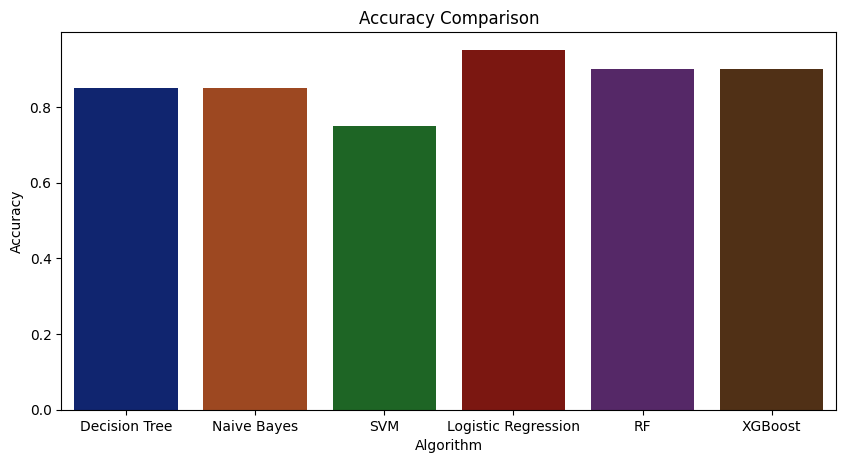

In [ ]:
plt.figure(figsize=[10,5],dpi = 100)
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Algorithm')
sns.barplot(y = acc,x = model,palette='dark')